In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [18]:
# suppose we have received the following data from some sensor
data_x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
data_y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

In [19]:
# fit a polynomial of order 6
m, n = data_x.shape
data_xx = np.hstack((np.ones((m, 1)), data_x))
data_xx= np.hstack((
    data_xx,
    (data_xx[:, 1] ** 2).reshape((m, 1)),
    (data_xx[:, 1] ** 3).reshape((m, 1)),
    (data_xx[:, 1] ** 4).reshape((m, 1)),
    (data_xx[:, 1] ** 5).reshape((m, 1)),
    (data_xx[:, 1] ** 6).reshape((m, 1))
))
data_xx[:, 1:] = (data_xx[:, 1:] - np.mean(data_xx[:, 1:], axis=0)) / np.std(data_xx[:, 1:], axis=0)

In [20]:
def h(X, theta):
  return X @ theta

In [21]:
data_xx.shape

(100, 7)

In [22]:
def J(theta, X, y):
    return np.mean(np.square(h(X, theta) - y))

In [23]:
# Implement gradient computation and theta update
def gradient_descent(X, y, iters, alpha):
    m, n = X.shape
    theta = np.zeros(n).reshape(n,1)
    loss=[]
    for i in range(iters):
        yhat = X @ theta - y
        gradient = (1/m) * X.T @ ((X @ theta) - y)
        theta -= alpha * gradient
        loss.append(J(theta,X,y))
    return theta,loss

In [24]:
theta1,loss=gradient_descent(data_xx,data_y,10000,0.01)

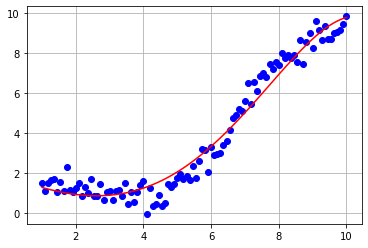

In [25]:
plt.grid()
plt.plot(data_x,data_y,'bo')
xlim,ylim=(plt.gca().get_xlim(),plt.gca().get_ylim())
plt.plot(data_x, data_xx@ theta1,'r-')

In [39]:
x = np.linspace(1.0, 10.0, 100)[:, np.newaxis]
y = np.sin(data_x) + 0.1 * np.power(data_x, 2) + 0.5 * np.random.randn(100, 1)

In [43]:
# Call stochastic gradient descent in the main loop
m,n= data_xx.shape
alpha=0.01
sample_size=25
epochs=1001
theta = np.zeros(n).reshape(n,1)
cost=[]
for i in range(epochs): 
    idx = np.random.choice(m, sample_size, replace=False)
    x_sample=data_xx[idx]
    y_sample=data_y[idx]
    yhat = x_sample @ theta - y_sample
    gradient = (1/m) * x_sample.T @ ((x_sample @ theta) - y_sample)
    theta -= alpha * gradient
    cost.append(J(theta,x_sample,y_sample))
print(theta,cost)

[[3.52804268]
 [0.61040223]
 [0.68761191]
 [0.63297285]
 [0.51569099]
 [0.37870779]
 [0.24342658]] [15.813407609893114, 22.880372919150958, 28.4856880421495, 27.41957522005465, 29.229545069822226, 19.3655219138558, 19.750155604490992, 16.154769013239335, 17.729684325805525, 30.160000814766423, 20.40735157298229, 23.91858185620549, 26.57781778045694, 16.69284563131618, 20.613921905004723, 23.33070935582693, 17.25130152659395, 21.104041010847826, 13.572569339311281, 24.24672186736417, 15.650699560021572, 16.083714702949763, 17.93389075798377, 18.95974671274888, 13.818096572108663, 12.726421705333621, 15.351837621496161, 15.986715751542528, 11.795212521143092, 15.391114428085004, 22.434753054923704, 25.95340079786627, 25.087925721146874, 9.926848069547976, 15.04097968336339, 15.380804649916886, 16.542580568673124, 16.080120605502042, 14.474891111146599, 18.827112117104804, 15.076530784557649, 13.004973898146666, 9.798145635401042, 20.319701648497855, 14.234280110558588, 17.987992488821465

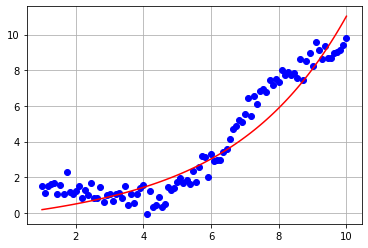

In [44]:
coeff=theta
plt.grid()
plt.plot(data_x,data_y,'bo')
xlim,ylim=(plt.gca().get_xlim(),plt.gca().get_ylim())
plt.plot(data_x, data_xx @ coeff,'r-')